# ÌïÑÏàò ÏΩîÎìú ÎèåÎ¶¨Í∏∞

In [1]:
# # Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏
# from google.colab import drive
# drive.mount('/content/drive')

# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import datetime
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# CWD = os.getcwd()
# DATA_PATH = "./dataset/"
# print("ÌòÑÏû¨ Í≤ΩÎ°ú: ", CWD)

# # pandas csv ÏùΩÏñ¥Ïò§Îäî Ìï®Ïàò
# def load_data(data_path, file):
#     path = os.path.join(data_path, file)
#     return pd.read_csv(path)

# # Îç∞Ïù¥ÌÑ∞ÏÖã ÏùΩÏñ¥Ïò§Í∏∞
# dr_items = load_data(DATA_PATH,'Dr_jart_items.csv')
# dr_reviews = load_data(DATA_PATH,'Dr_jart_reviews.csv')
# cs_items = load_data(DATA_PATH,'cosrx_items.csv')
# cs_reviews = load_data(DATA_PATH,'cosrx_reviews.csv')
# if_items = load_data(DATA_PATH,'imfrom_items.csv')
# if_reviews = load_data(DATA_PATH,'imfrom_reviews.csv')
# bj_items = load_data(DATA_PATH,'joseon_items.csv')
# bj_reviews = load_data(DATA_PATH,'joseon_reviews.csv')
# pu_items = load_data(DATA_PATH,'purito_items.csv')
# pu_reviews = load_data(DATA_PATH,'purito_reviews.csv')
# skinsort = load_data(DATA_PATH,'skinsort_0115.csv')

In [2]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
dr_items = pd.read_csv('Dr_jart_items.csv')
dr_reviews = pd.read_csv('Dr_jart_reviews.csv')
cs_items = pd.read_csv('cosrx_items.csv')
cs_reviews = pd.read_csv('cosrx_reviews.csv')
if_items = pd.read_csv('imfrom_items.csv')
if_reviews = pd.read_csv('imfrom_reviews.csv')
bj_items = pd.read_csv('joseon_items.csv')
bj_reviews = pd.read_csv('joseon_reviews.csv')
pu_items = pd.read_csv('purito_items.csv')
pu_reviews = pd.read_csv('purito_reviews.csv')
skinsort = pd.read_csv('datasheet.csv')

In [3]:
# Ï†ÑÏ≤¥Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ EDA
def eda_overveiw(df):

    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    print(f"\n=================== DATA OVERVIEW ===================")

    # Îç∞Ïù¥ÌÑ∞ ÏÉÅÎã®Î∂Ä ÌôïÏù∏
    print("\n----------------- Head -----------------")
    print(df.head())
    print("=" * 60)

    # Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ Î∞è ÌÅ¨Í∏∞ ÌôïÏù∏
    print("\n--------------- Information ---------------")
    print(df.info())
    print(f"\nSize: {df.size}")
    print(f"Shape: {df.shape}")
    print("=" * 60)

    # Í≤∞Ï∏°Ïπò ÌôïÏù∏
    print("\n--------------- Missing Values ---------------")
    print(df.isnull().sum())
    print("=" * 60)

    # Ï§ëÎ≥µÍ∞í ÌôïÏù∏
    print("\n--------------- Duplicate Values ---------------")
    print(df.duplicated().value_counts())
    print("=" * 60)

    # Îç∞Ïù¥ÌÑ∞ Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ ÌôïÏù∏ (int, float type)
    print("\n------------ Descriptive Statistics (Numeric) ------------")
    print(df.describe())
    print("=" * 60)

    # Îç∞Ïù¥ÌÑ∞ Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ ÌôïÏù∏ (object type)
    print("\n------------ Descriptive Statistics (Categorical) ------------")

    try:
        print(df.describe(include=[object]))

    except:
        object_cols = df.select_dtypes(include=['object']).columns
        error_cols = []

        for col in object_cols:
            if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
                error_cols.append(col)
        print(f"{error_cols} Excluded")
        print(df.loc[:, ~df.columns.isin(error_cols)].describe(include=[object]))

    print("=" * 60)

eda_overveiw(dr_items)


=================== DATA OVERVIEW ===================

----------------- Head -----------------
         ASIN                                              title  order  \
0  B07DR5816K  Dr.Jart+ Cicapair Tiger Grass Color Correcting...      1   
1  B07GTMPYSG  Dr.Jart+ Cicapair Tiger Grass Color Correcting...      1   
2  B081SRDRD7  Dr.Jart+ Cryo Rubber Brightening Face Mask | K...      6   
3  B081SRSNWW  Dr.Jart+ Cryo Rubber Face Mask with Moisturizi...      2   
4  B084Z4W4PK  Dr.Jart+ Dermask Micro Jet Brightening Solutio...     27   

             category     brand  price  global_rating_count  \
0              Makeup  Dr.Jart+   54.0                 3367   
1  Skin Care Products  Dr.Jart+   25.0                 3367   
2  Skin Care Products  Dr.Jart+   16.0                   77   
3  Skin Care Products  Dr.Jart+   16.0                  373   
4  Skin Care Products  Dr.Jart+   10.0                   37   

                                         description  \
0  {"Benefits": "

In [4]:
# Î∂ÑÏÑù & Ï†ÑÏ≤òÎ¶¨Ïö©ÏúºÎ°ú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
dr_items_copy = dr_items.copy()
dr_reviews_copy = dr_reviews.copy()
cs_items_copy = cs_items.copy()
cs_reviews_copy = cs_reviews.copy()
if_items_copy = if_items.copy()
if_reviews_copy = if_reviews.copy()
bj_items_copy = bj_items.copy()
bj_reviews_copy = bj_reviews.copy()
pu_items_copy = pu_items.copy()
pu_reviews_copy = pu_reviews.copy()
skinsort_copy = skinsort.copy()

In [5]:
# 'brand'Í∞Ä ÏóÜÍ±∞ÎÇò Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ -> Í∞Å ÌååÏùºÎßàÎã§ Îã§Î•¥Í≤å Ï†ïÎ¶¨ ÌïÑÏöî
# Ïù¥Ïú† - Î∏åÎûúÎìúÎ≥Ñ ÏïÑÏù¥ÌÖúÎßå Ï∂îÏ∂úÌñàÍ∏∞ ÎïåÎ¨∏ + ÏÑ∏Î∂ÄÏÇ¨Ìï≠Ïóê Î∏åÎûúÎìúÎ™Ö ÏûëÏÑ±ÎêòÏñ¥ ÏûàÏúºÎãà Í∑∏Í≤ÉÎ≥¥Í≥† ÌåêÎã®

# Î∏åÎûúÎìú Î™Ö Î≥ÄÍ≤Ω
brand_list = ['Dr.Jart+', 'COSRX', "I'm from", 'Beauty of Joseon','PURITO']
dr_items_copy['brand'].replace('No brand', brand_list[0], inplace=True)
cs_items_copy['brand'].replace('No brand', brand_list[1], inplace=True)
if_items_copy['brand'].replace('No brand', brand_list[2], inplace=True)
bj_items_copy['brand'].replace('No brand', brand_list[3], inplace=True)
pu_items_copy['brand'].replace('No brand', brand_list[4], inplace=True)

# items_dfÎì§Ïùò Ïª¨Îüº ÏàòÏ†ïÏùÑ ÏúÑÌï¥ dfÎ•º listÏóê Ìè¨Ìï®ÏãúÌÇ§Í∏∞
items_list = [dr_items_copy, cs_items_copy, if_items_copy, bj_items_copy, pu_items_copy]

# reviews_dfÎì§Ïùò Ïª¨Îüº ÏàòÏ†ïÏùÑ ÏúÑÌï¥ dfÎ•º listÏóê Ìè¨Ìï®ÏãúÌÇ§Í∏∞
reviews_list = [dr_reviews_copy, cs_reviews_copy, if_reviews_copy, bj_reviews_copy, pu_reviews_copy]

In [6]:
# items_dfÎì§Ïùò Í≤∞Ï∏°ÏπòÎ•º NaN Í∞íÏúºÎ°ú ÌïúÎ≤àÏóê Ï≤òÎ¶¨
def preprocess_items(df_items):

    df_items['best_sellers_rank_Feature'].replace('No result', np.nan, inplace=True)
    df_items['global_rating_count'].replace('No rating', np.nan, inplace=True)
    df_items['Special_Feature'].replace('No special feature', np.nan, inplace=True)

for i in range(len(items_list)):
    preprocess_items(items_list[i])

# reviews_dfÎì§Ïùò Í≤∞Ï∏°ÏπòÎ•º NaN Í∞íÏúºÎ°ú ÌïúÎ≤àÏóê Ï≤òÎ¶¨
def preprocess_reviews(df_reviews):

    df_reviews['date'].replace('No date', np.nan, inplace=True)
    df_reviews['review_rating'].replace('No review', np.nan, inplace=True)

for i in range(len(reviews_list)):
    preprocess_reviews(reviews_list[i])

# review_df : reivew content Í≤∞Ï∏°Ïπò Ï†úÍ±∞ Ìï®Ïàò
def dropna_reviews(reviews_df):
    reviews_df.dropna(inplace=True)
    reviews_df.reset_index(inplace=True)

# review data Í≤∞Ï∏°Ïπò Ï†úÍ±∞
for i in range(len(reviews_list)):
    dropna_reviews(reviews_list[i])

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ EDAÎ•º ÏßÑÌñâÌïòÍ∏∞ ÏúÑÌïú ÏïÑÏù¥ÌÖú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
amazon_items_df = pd.concat([dr_items_copy, cs_items_copy, if_items_copy, bj_items_copy, pu_items_copy])

In [7]:
# df_items : description Ïª¨Îüº
def preprocess_description(df_items):

    for i in range(len(df_items)):
        description = ast.literal_eval(df_items.description[i])

        for key, value in description.items():
            if key not in df_items.columns:
                df_items[key] = np.nan
            df_items.loc[i, key] = value

    df_items.drop(columns=['description'], inplace=True)

# df_items : detail_dict Ïª¨Îüº
def preprocess_detail_dict(df_items):

    for i in range(len(df_items)):
        detail_dict = ast.literal_eval(df_items.detail_dict[i])

        for key, value in detail_dict.items():
            if key not in df_items.columns:
                df_items[key] = np.nan
            df_items.loc[i, key] = value

    df_items.drop(columns=['detail_dict'], inplace=True)

# df_items : best_sellers_rank_Feature Ïª¨ÎüºÏùÑ ÏÑ∏Î∂Ä Ïª¨ÎüºÏúºÎ°ú ÎÇòÎàÑÍ∏∞
def preprocess_best_sellers_col(df_items):

        for i in range(len(df_items)):
            try:
                value = df_items.best_sellers_rank_Feature[i]

                if pd.isna(value): #np.nan Ïù∏ Ïï†Îì§
                    # print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")
                    continue

                if isinstance(value, float): # float ÌÉÄÏûÖÏù∏ Ïï†Îì§
                    value = str(value)
                    print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")

                cat_list = df_items.best_sellers_rank_Feature[i].split('#')

                df_items.loc[i, 'Category'] = cat_list[1]
                df_items.loc[i, 'Sub_Category'] = cat_list[2]

                detail_list = df_items.Category[i].split('in')

                df_items.loc[i, 'Category_Rank']= detail_list[0]
                df_items.loc[i, 'Category_Name']= detail_list[1]

                df_items.loc[i, 'Category_Name'] = df_items.Category_Name[i].split('(')[0]

                sub_list = df_items.Sub_Category[i].split('in')

                df_items.loc[i, 'Sub_Category_Rank']= sub_list[0]
                df_items.loc[i, 'Sub_Category_Name']= sub_list[1]

            except Exception as e:
                print(f"{i}, {df_items.best_sellers_rank_Feature[i]} Passed")
                print(f"Error: {e}")

                continue

        df_items.drop(columns=['best_sellers_rank_Feature'], inplace=True)

# df_itemsÎì§Ïùò ÏπºÎüº ÏàòÏ†ï ÌïúÎ≤àÏóê ÏßÑÌñâ
for i in range(len(items_list)) :
    preprocess_description(items_list[i])
    preprocess_detail_dict(items_list[i])
    preprocess_best_sellers_col(items_list[i])

In [8]:
# df_reviews : date, rating Ïª¨Îüº
def preprocess_review_cols(df_reviews):

    for i in range(len(df_reviews)):

        try:

            if pd.isna(df_reviews.date[i]) or 'on' not in df_reviews.date[i]:
                # print(f"{i}, {df_reviews.date[i]} Passed")
                continue
            else:
                df_reviews.loc[i, 'review_date'] = df_reviews.date[i].split('on')[1]
                df_reviews.loc[i, 'review_date'] = pd.to_datetime(df_reviews.review_date[i])

            if pd.isna(df_reviews.review_rating[i]):
                print(f"{i}, {df_reviews.review_rating[i]} Passed")
                continue
            else:
                df_reviews.loc[i, 'review_rating'] = float(df_reviews.review_rating[i].split('out')[0])
        except Exception as e:
            print(f"{i}, {df_reviews.review_rating[i]}, Error: {e}")
            continue

# df_itemsÎì§Ïùò Ïª¨Îüº ÌïúÎ≤àÏóê ÏàòÏ†ïÌïòÍ∏∞: 'review_date'Î•º ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω, review_ratingÏùÑ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÍ≤Ω
for i in range(len(reviews_list)) :
    preprocess_review_cols(reviews_list[i])
    reviews_list[i]['review_date'] = pd.to_datetime(reviews_list[i]['review_date'])
    reviews_list[i].drop(columns=['date'], inplace=True)
    reviews_list[i]['review_rating'] = pd.to_numeric(reviews_list[i]['review_rating'], errors='coerce', downcast='integer')

In [9]:
# Î∏åÎûúÎìúÎ≥Ñ item, review Îç∞Ïù¥ÌÑ∞ merge Í≤∞Ìï©
dr_df = pd.merge(dr_items_copy, dr_reviews_copy, on='ASIN')
cs_df = pd.merge(cs_items_copy, cs_reviews_copy, on='ASIN')
if_df = pd.merge(if_items_copy, if_reviews_copy, on='ASIN')
bj_df = pd.merge(bj_items_copy, bj_reviews_copy, on='ASIN')
pu_df = pd.merge(pu_items_copy, pu_reviews_copy, on='ASIN')

merge_list = [dr_df, cs_df, if_df, bj_df, pu_df]

In [10]:
 def preprocess_merge_df(merge_df):

    # Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω, Î∂àÌïÑÏöî Ïª¨Îüº ÏÇ≠Ï†ú, Ïù∏Îç±Ïä§ ÏàòÏ†ï, Í≤∞Ï∏°Ïπò ÌôïÏù∏
    merge_df.rename(columns={'content':'review_content', 'title_x':'title'}, inplace=True)
    merge_df.drop(['title_y'], axis=1, inplace=True)
    merge_df.reset_index(drop=True, inplace=True)
    merge_df.isnull().sum()

    # Category_Rank
    merge_df['Category_Rank'] = merge_df['Category_Rank'].apply(
        lambda x: str(x).replace(',', '') if not pd.isna(x) and isinstance(x, float) else x
    ).astype('str').apply(lambda x: x.replace(',', '') if x != 'nan' else None)

    # Sub_Category_Rank
    merge_df['Sub_Category_Rank'] = merge_df['Sub_Category_Rank'].apply(
        lambda x: str(x).replace(',', '') if not pd.isna(x) and isinstance(x, float) else x
    ).astype('str').apply(lambda x: x.replace(',', '') if x != 'nan' else None)

    # review_rating
    merge_df['review_rating'] = merge_df['review_rating'].apply(
        lambda x: str(x) if not pd.isna(x) and isinstance(x, float) else x
    ).astype('float', errors='ignore')

    # review_date
    merge_df['review_date'] = merge_df['review_date'].apply(
        lambda x: pd.to_datetime(x) if not pd.isna(x) else None
    )

    merge_df.reset_index(drop=True, inplace=True)

    merge_df.info()
    merge_df.head(2)
    # amazon_df.to_csv(DATA_PATH + 'amazon_df_0116.csv', encoding='utf-8')

In [11]:
# Ïñ∏Ïñ¥ Í∞êÏßÄ Î∞è Î≤àÏó≠ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨: langdetect Í∞ÑÌé∏ÌïòÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏñ¥ÏÑú ÏÑ†ÌÉù, FasttextÎäî ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Îã§Ïö¥ Î∞õÏïÑÏïº Ìï¥ÏÑú ÎØ∏ÏÇ¨Ïö©

from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from deep_translator import GoogleTranslator

# Ïñ∏Ïñ¥ Í∞êÏßÄ
def detect_language(text):

    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# ÏòÅÏñ¥Í∞Ä ÏïÑÎãå Ïñ∏Ïñ¥Î•º Íµ¨Í∏ÄÎ≤àÏó≠ÏùÑ ÌôúÏö©ÌïòÏó¨ ÏòÅÏñ¥Î°ú Î≤àÏó≠
def translate_en(text):

    to_translate = text
    translated = GoogleTranslator(source='auto', target='english').translate(to_translate)

    return translated

In [12]:
def text_preprocessing(merge_df) :

    # str ÌòïÏãùÏù¥ ÏïÑÎãê Í≤ΩÏö∞ Ïò§Î•ò Î∞©ÏßÄÎ•º ÏúÑÌïú ÏΩîÎìú
    merge_df['review_content'] = merge_df['review_content'].fillna('').astype(str)

    # Î¶¨Î∑∞ Ïñ∏Ïñ¥Í∞Ä ÏòÅÏñ¥Í∞Ä ÏïÑÎãå Í≤ΩÏö∞ -> Î≤àÏó≠
    #merge_df['detected_language'] = merge_df['review_content'].apply(detect_language)
    merge_df['detected_language'] = merge_df['review_content'].apply(lambda x: detect_language(x) if isinstance(x, str) else None)

    merge_df.loc[merge_df['detected_language'] != 'en', 'review_content'] = merge_df.loc[merge_df['detected_language'] != 'en', 'review_content'].apply(translate_en)

    # merge_df.to_csv(DATA_PATH + "amazon_koreaOnly_translated.csv", encoding='utf-8')
    merge_df.rename(columns={'category':'Amazon_Category'}, inplace=True)
    merge_df['review_date'] = merge_df['review_date'].apply(lambda x: pd.to_datetime(x) if not pd.isna(x) else None)
    merge_df['global_rating_count'] = merge_df['global_rating_count'].astype('Int64')
    merge_df['Category_Rank'] = merge_df['Category_Rank'].astype('Int64')
    merge_df['Sub_Category_Rank'] = merge_df['Sub_Category_Rank'].astype('Int64')

    print(merge_df.head(2))

# Î∏åÎûúÎìú Î≥Ñ ÏïÑÏù¥ÌÖú, Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ mergeÎ°ú Í≤∞Ìï© ÌõÑ Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞ Î≤àÏó≠ ÏßÑÌñâ
# ÏãúÍ∞ÑÏù¥ Îã§ÏÜå ÏÜåÏöî
for i in range(len(merge_list)):
    preprocess_merge_df(merge_list[i])
    text_preprocessing(merge_list[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ASIN                             1771 non-null   object        
 1   title                            1771 non-null   object        
 2   order                            1771 non-null   int64         
 3   category                         1771 non-null   object        
 4   brand                            1771 non-null   object        
 5   price                            1771 non-null   float64       
 6   global_rating_count              1771 non-null   int64         
 7   Special_Feature                  705 non-null    object        
 8   total_star_mean                  1771 non-null   float64       
 9   Benefits                         1771 non-null   object        
 10  Description                      1771 non-null   object     

In [13]:
# Í∞Å Î∏åÎûúÎìúÎ≥Ñ Í≤∞Ï∏°Ïπò Î∞è Ï†ÑÏ≤òÎ¶¨ Ïã§Ïãú ÌõÑ Í≤∞Ìï©
amazon_df = pd.concat([dr_df, cs_df, if_df, bj_df, pu_df])
############# ÏÇ≠Ï†úÌï† Ïª¨Îüº Îã§Í∞ôÏù¥ Í≤∞Ï†ï ÌïÑÏöî #############

In [14]:
# nltk ÏóêÏÑú Punkt tokenizer & stopwords listÎ•º Îã§Ïö¥Î°úÎìú
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dav74\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dav74\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dav74\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dav74\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
from nltk.util import ngrams
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# # # lda Î™®Îç∏ÎßÅ Ï∂îÍ∞Ä Î∂àÏö©Ïñ¥
# lda_stopwords = [
#     "would", "use", "using","locals", "cf", "fb", "ba" , "line", "lines","formula", "formulas", "collection", "collections",
# "really","skin","used","time", "makes","tried","one","skin feel","lot","trying","buy","apply","quite","way","never","bought", "cosrx","always","less",
# "without","absolutely","might","maybe","sure","think","though", "getting","result","know", "especially","dr jart","feel","purchase","definitely",
# "im","thing","started","need","another","noticed","actually", "people","got","box","every","found","jart","wear",
# "set", "sets", "value", "values", "pack", "packs","new","ive"]

# # # K-beauty Ï∂îÍ∞Ä Î∂àÏö©Ïñ¥
# kbeauty_stopwords =  [
# "and", "beauty", "skincare", "cosmetics", "product", "products", "from","for","im","i'm","floz",
#  "care", "makeup", "mask", "sheet","best", "top", "favorite",
# "amazing", "perfect", "review", "brand",
# "brands", "item", "items", "category", "categories", "ingredient", "ingredients",
# "set", "sets", "value", "values", "pack", "packs","latest", "exclusive", "limited",
# "special", "popular", "quality", "For",
# "safe", "worked", "works", " product"
# "face", "stuff","joseon",
# "dont","want","type","facial","money","nan","1","no","non","not", "drjart","to",
# "From" , "drjrt", "types", "of", "100ml","200ml","300ml","150ml","250ml","50ml","30ml", "338","507","676","purito","dr", "12", "100", "5", 
# '35', '‚Ä¢', '50', 'became', 'become', 'id', 'tag', 'film', 'ski', 'try', 'bag', 'ml', 'fl', 'oz', 'youre'
# ]

# Î∂àÏö©Ïñ¥ ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
one_stopwords = [
"would", "use", "using","locals", "cf", "fb", "ba" , "line", "lines","formula", "formulas", "collection", "collections",
"really","skin","used","time", "makes","tried","one","skin feel","lot","trying","buy","apply","quite","way","never","bought", "cosrx","always","less",
"without","absolutely","might","maybe","sure","think","though", "getting","result","know", "especially","dr jart","feel","purchase","definitely",
"im","thing","started","need","another","noticed","actually", "people","got","box","every","found","jart","wear",
"set", "sets", "value", "values", "pack", "packs","new","ive", "and", "beauty", "skincare", "cosmetics", "product", "products", "from","for","im","i'm","floz",
"care", "makeup", "mask", "sheet","best", "top", "favorite","amazing", "perfect", "brand", "brands", "item", "items", "category", "categories", "ingredient", "ingredients",
"set", "sets", "value", "values", "pack", "packs","latest", "exclusive", "limited","special", "popular", "quality", "For","safe", "worked", "works", " product"
"face", "stuff","joseon", "dont","want","type","facial","money","nan","1","no","non","not", "drjart","to", "From" , "drjrt", "types", "of", "100ml","200ml","300ml","150ml","250ml",
"50ml","30ml", "338","507","676","purito","dr", "12", "100", "5", '35', '‚Ä¢', '50', 'became', 'become', 'id', 'tag', 'film', 'ski', 'try', 'bag', 'ml', 'fl', 'oz', 'youre',
'‚Äô', '‚Äù', 'skin', 'product', 'like', 'get', 'work',  'many', 'first', 'subject', 're', 'edu','object','generator','genexpr', 'much', 'little','bit','also','even', 'see','super','make','made','go',
'put','still','come','say','give','leave','keep','far','however','year','overall','left','take','highly','area','almost','two','could','breakout','break',
'fat','right','2','minute','seems','around','time','going','away','cause','leaving','nothing','back','ever','already','yet','star','part','liked','came',
'give','second','side','may','reaction','usually','3','next','full','job','looked','making','review','seem','big','kind','get','either',
'buying','thing','stay','said','hour','fan','jar','plus','add','‚Äú','gave','ordered','went','caused','others','point','twice','thats','added','end','someone',
'took','gone','let','anyone','amazon','order','able','seen','10','saw','else','one','burn','ill','test','fact','gon', 'coverage', 'cast', 'broke', 'quickly', 'bump', 'match',
'month', 'week', 'version', 'better', 'loved', 'holy', 'ok', 'prone', 'quickly', 'seoul', 'look', 'minute', 'amount', 'u', 'thought', 'korean', 'couple', 
'strong', 'cap', 'open', 'us', 'wife', 'unfortunately', 'everything', 'break', 'easily', 'puffiness', 'received', 'last', 'must', 'result', 'finish',
'list', 'inside', 'return', 'broken', 'mark', '21', 'star', 'opened', 'picture', 'waste', 'tret', 'sister', 'out', 'among', 'react', 'working', 'terribly', 'inci',
'patch', 'timeless', 'bump', 'one', 'theyre', 'combo', 'immediately', 'update', 'butter', 'problem', 'ratio', 'refill', 'interesting', 'label', 'whole', 'wave', 'nice', 'love', 'korea',
'expiration', 'date', 'english'
]


stop_words = stopwords.words('english')
stop_words.extend(one_stopwords)


# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
def clean_text(text):
    if isinstance(text, str):

        # ÏÜåÎ¨∏ÏûêÎ°ú Î™®Îëê Î≥ÄÌôò
        text = text.lower()

        # URL Ï†úÍ±∞
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # ÎßàÌÅ¨Îã§Ïö¥ Ïä§ÌÉÄÏùº ÎßÅÌÅ¨ Ï†úÍ±∞
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        # @ Ï†úÍ±∞
        text = re.sub(r'@\w+', '', text)

        # Íµ¨ÎëêÏ†ê, ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

# ÌÖçÏä§Ìä∏ ÌÜ†ÌÅ∞Ìôî
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# Î∂àÏö©Ïñ¥ Ï†úÍ±∞
def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

# (Í∏∞Ï°¥) stemming
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

# (Ï∂îÍ∞Ä) -> lemmatization Ìï®ÏàòÎ°ú Î≥ÄÍ≤Ω
def lemmatize_tokens(tokens):
    if isinstance(tokens, list):
        return [lemmatizer.lemmatize(token) for token in tokens]
    else:
        return tokens

# Ï†ÄÏû•
amazon_df['cleaned_title'] = amazon_df['title'].apply(clean_text)
amazon_df['cleaned_review'] = amazon_df['review_content'].apply(clean_text)
skinsort_copy['cleaned_ingridients'] = skinsort_copy['ingridients'].apply(clean_text)
skinsort_copy['cleaned_afterUse'] = skinsort_copy['afterUse'].apply(clean_text)

amazon_df['tokenized_title'] = amazon_df['cleaned_title'].apply(tokenize_text)
amazon_df['tokenized_review'] = amazon_df['cleaned_review'].apply(tokenize_text)
skinsort_copy['tokenized_ingridients'] = skinsort_copy['cleaned_ingridients'].apply(tokenize_text)
skinsort_copy['tokenized_afterUse'] = skinsort_copy['cleaned_afterUse'].apply(tokenize_text)

amazon_df['stemmed_title'] = amazon_df['tokenized_title'].apply(stem_tokens)
amazon_df['stemmed_review'] = amazon_df['tokenized_review'].apply(stem_tokens)
skinsort_copy['stemmed_ingridients'] = skinsort_copy['tokenized_ingridients'].apply(stem_tokens)
skinsort_copy['stemmed_afterUse'] = skinsort_copy['tokenized_afterUse'].apply(stem_tokens)

amazon_df['stpw_processed_title'] = amazon_df['tokenized_title'].apply(remove_stopwords)
amazon_df['stpw_processed_review'] = amazon_df['tokenized_review'].apply(remove_stopwords)
skinsort_copy['stpw_processed_ingridients'] = skinsort_copy['tokenized_ingridients'].apply(remove_stopwords)
skinsort_copy['stpw_processed_afterUse'] = skinsort_copy['tokenized_afterUse'].apply(remove_stopwords)

# bigram ÌïòÍ∏∞ Ï†Ñ
amazon_df['lemmatized_title'] = amazon_df['stpw_processed_title'].apply(lemmatize_tokens)
amazon_df['lemmatized_review'] = amazon_df['stpw_processed_review'].apply(lemmatize_tokens)
skinsort_copy['lemmatized_ingridients'] = skinsort_copy['stpw_processed_ingridients'].apply(lemmatize_tokens)
skinsort_copy['lemmatized_afterUse'] = skinsort_copy['stpw_processed_afterUse'].apply(lemmatize_tokens)

amazon_df.head(2)

ASIN                                              title  order  \
0  B07DR5816K  Dr.Jart+ Cicapair Tiger Grass Color Correcting...      1   
1  B07DR5816K  Dr.Jart+ Cicapair Tiger Grass Color Correcting...      1   

  Amazon_Category     brand  price  global_rating_count Special_Feature  \
0          Makeup  Dr.Jart+   54.0                 3367  Redness relief   
1          Makeup  Dr.Jart+   54.0                 3367  Redness relief   

   total_star_mean                                           Benefits  \
0              4.2  Right after using, 92% said skin looked less r...   
1              4.2  Right after using, 92% said skin looked less r...   

                                         Description  \
0  A green-to-beige cica cream that instantly neu...   
1  A green-to-beige cica cream that instantly neu...   

                                       Suggested use Manufacturer  \
0  Warm between hands then gently press and blend...     Dr.Jart+   
1  Warm between hands then gently press and blend...     Dr.Jart+   

  Country of Origin Item model number                     Product Dimensions  \
0            Canada        H59X011000  3.31 x 2.36 x 2.56 inches; 1.7 ounces   
1            Canada        H59X011000  3.31 x 2.36 x 2.56 inches; 1.7 ounces   

  Is Discontinued By Manufacturer  UPC Language  \
0                              No  NaN      NaN   
1                              No  NaN      NaN   

                                            Category            Sub_Category  \
0  2,574 in Beauty & Personal Care (See Top 100 i...  14 in CC Facial Creams   
1  2,574 in Beauty & Personal Care (See Top 100 i...  14 in CC Facial Creams   

   Category_Rank             Category_Name  Sub_Category_Rank  \
0           2574   Beauty & Personal Care                  14   
1           2574   Beauty & Personal Care                  14   

   Sub_Category_Name  index     review_num     customer_id    customer_name  \
0   CC Facial Creams      0  B07DR5816K__0  R1AVY9U9QOGEMA          Kelli C   
1   CC Facial Creams      1  B07DR5816K__1   R6EYDZA8D6SJ4  Amazon Customer   

   review_rating                                     review_content  \
0            3.0  Not as good as people hype it up to be. I‚Äôll u...   
1            3.0  Had to use this for a bit to give it a review....   

  review_date detected_language Ingredients Manufacturer recommended age  \
0  2025-01-18                en         NaN                          NaN   
1  2025-01-18                en         NaN                          NaN   

  Date First Available Batteries Department Package Dimensions  is_bundle  \
0                  NaN       NaN        NaN                NaN        NaN   
1                  NaN       NaN        NaN                NaN        NaN   

                                       cleaned_title  \
0  drjart cicapair tiger grass color correcting t...   
1  drjart cicapair tiger grass color correcting t...   

                                      cleaned_review  \
0  not as good as people hype it up to be i‚Äôll us...   
1  had to use this for a bit to give it a review ...   

                                     tokenized_title  \
0  [drjart, cicapair, tiger, grass, color, correc...   
1  [drjart, cicapair, tiger, grass, color, correc...   

                                    tokenized_review  \
0  [not, as, good, as, people, hype, it, up, to, ...   
1  [had, to, use, this, for, a, bit, to, give, it...   

                                       stemmed_title  \
0  [drjart, cicapair, tiger, grass, color, correc...   
1  [drjart, cicapair, tiger, grass, color, correc...   

                                      stemmed_review  \
0  [not, as, good, as, peopl, hype, it, up, to, b...   
1  [had, to, use, thi, for, a, bit, to, give, it,...   

                                stpw_processed_title  \
0  [cicapair, tiger, grass, color, correcting, tr...   
1  [cicapair, tiger, grass, color, correcting, tr...   

                            

In [16]:
from collections import Counter

word_counts = Counter(" ".join([" ".join(review) for review in amazon_df['lemmatized_review'].dropna()]).split())
common_words = word_counts.most_common(500)  # Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•ÌïòÎäî 50Í∞ú Îã®Ïñ¥ ÌôïÏù∏
print(common_words)

[('face', 4304), ('good', 2525), ('cream', 2351), ('great', 2274), ('dry', 2236), ('well', 2139), ('serum', 2112), ('sensitive', 1906), ('feel', 1725), ('day', 1618), ('moisturizer', 1487), ('smell', 1432), ('toner', 1366), ('scent', 1235), ('recommend', 1234), ('soft', 1144), ('cleanser', 1137), ('feeling', 1134), ('bottle', 1093), ('eye', 1058), ('help', 993), ('oily', 984), ('light', 962), ('texture', 935), ('leaf', 925), ('night', 919), ('doesnt', 915), ('moisturizing', 865), ('smooth', 857), ('routine', 830), ('price', 826), ('long', 807), ('redness', 806), ('hydrated', 806), ('gentle', 764), ('sticky', 744), ('acne', 727), ('oil', 710), ('clean', 708), ('hydrating', 700), ('felt', 688), ('since', 663), ('didnt', 646), ('go', 639), ('pore', 634), ('looking', 631), ('morning', 631), ('easy', 625), ('absorbs', 603), ('greasy', 601), ('sunscreen', 595), ('difference', 588), ('irritation', 568), ('look', 555), ('find', 546), ('small', 541), ('result', 539), ('wash', 534), ('enough', 5

## ÌïÑÏàò ÏΩîÎìú (ÏúÑÍπåÏßÄ Ïã§ÌñâÌïòÍ∏∞)

## Î∞îÏù¥Í∑∏Îû®, Ìä∏Î¶¨Í∑∏Îû®(ÏÑ†ÌÉù)

In [17]:
# bigram 
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in amazon_df.cleaned_review if isinstance(comment, str)])

# # Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Î∞òÏòÅÎêú ÏÉÅÌÉúÏóêÏÑú ÏßÑÌñâ
# finder.apply_word_filter(lambda w: w in stop_words)

# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigram_scores[:10]

[(('holy', 'grail'), 13.083228713375007),
 (('fl', 'oz'), 12.973860724119735),
 (('expiration', 'date'), 12.896143160774512),
 (('play', 'video'), 12.763505392196391),
 (('tea', 'tree'), 11.72746132618283),
 (('centella', 'asiatica'), 11.420975906359727),
 (('cotton', 'pad'), 11.326182823392601),
 (('vitamin', 'c'), 11.318560190418953),
 (('dark', 'circles'), 11.20224628850019),
 (('white', 'cast'), 11.116417475595956)]

In [18]:
# trigram
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in amazon_df.cleaned_review if isinstance(comment, str)])
# finder.apply_word_filter(lambda w: w in stop_words)
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)
trigram_scores[:10]

[(('vitamin', 'c', 'serum'), 18.002071132689547),
 (('beauty', 'of', 'joseon'), 17.699317389095974),
 (('dr', 'jart', 'products'), 17.241024100906394),
 (('made', 'in', 'korea'), 15.700232650496279),
 (('a', 'white', 'cast'), 15.127459415033162),
 (('broke', 'me', 'out'), 14.89850022832788),
 (('as', 'soon', 'as'), 14.467977703205719),
 (('the', 'snail', 'mucin'), 14.29794885214612),
 (('acne', 'prone', 'skin'), 14.218096090638998),
 (('ive', 'been', 'using'), 14.13895068135691)]

In [19]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

In [20]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

In [21]:
# Can set pmi threshold to whatever makes sense - eyeball through and select threshold where n-grams stop making sense
# choose top 500 ngrams in this case ranked by PMI that have noun like structures
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram.pmi > 5, axis = 1)][:500]

filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: \
                                                 trigram_filter(trigram['trigram'])\
                                                 and trigram.pmi > 5, axis = 1)][:500]

bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [22]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

reviews_w_ngrams = pd.DataFrame(amazon_df.cleaned_review.copy())
reviews_w_ngrams.cleaned_review = reviews_w_ngrams.cleaned_review.map(lambda x: replace_ngram(x) if isinstance(x, str) else x)

# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
reviews_w_ngrams = reviews_w_ngrams.cleaned_review.map(lambda x: [word for word in x.split() if word not in stop_words and len(word) > 2] if isinstance(x, str) else x)
reviews_w_ngrams.dropna(axis=0, inplace=True)
reviews_w_ngrams.isnull().sum()

reviews_w_ngrams.head()
final_reviews = reviews_w_ngrams.copy()

## ÌÖåÏä§Ìä∏ ÏΩîÎìú

In [23]:
# ! pip install pyLDAvis

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle
import pyLDAvis

In [24]:
# amazon_df_sa : ÌèâÏ†ê 4Ï†ê Ïù¥ÏÉÅ / amazon_df_dsa : ÌèâÏ†ê 2Ï†ê Ïù¥Ìïò
amazon_df_sa = amazon_df[amazon_df['review_rating'] >= 4]
amazon_df_dsa = amazon_df[amazon_df['review_rating'] <= 2]

In [25]:
# amazon_df_sa : ÌèâÏ†ê 4Ï†ê Ïù¥ÏÉÅ / amazon_df_dsa : ÌèâÏ†ê 2Ï†ê Ïù¥Ìïò
amazon_df_sa_dr = amazon_df_sa[amazon_df_sa['brand'] == 'Dr.Jart+']
amazon_df_sa_cs = amazon_df_sa[amazon_df_sa['brand'] == 'COSRX']
amazon_df_sa_bj = amazon_df_sa[amazon_df_sa['brand'] == 'Beauty of Joseon']
amazon_df_sa_if = amazon_df_sa[amazon_df_sa['brand'] == "I'm from"]
amazon_df_sa_pu = amazon_df_sa[amazon_df_sa['brand'] == 'PURITO']

In [26]:
amazon_df_dsa_dr = amazon_df_dsa[amazon_df_dsa['brand'] == 'Dr.Jart+']
amazon_df_dsa_cs = amazon_df_dsa[amazon_df_dsa['brand'] == 'COSRX']
amazon_df_dsa_bj = amazon_df_dsa[amazon_df_dsa['brand'] == 'Beauty of Joseon']
amazon_df_dsa_if = amazon_df_dsa[amazon_df_dsa['brand'] == "I'm from"]
amazon_df_dsa_pu = amazon_df_dsa[amazon_df_dsa['brand'] == 'PURITO']

Round: 5


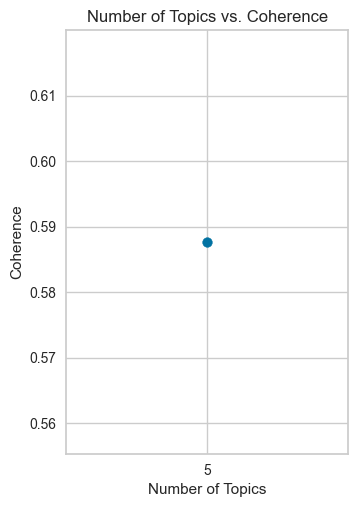

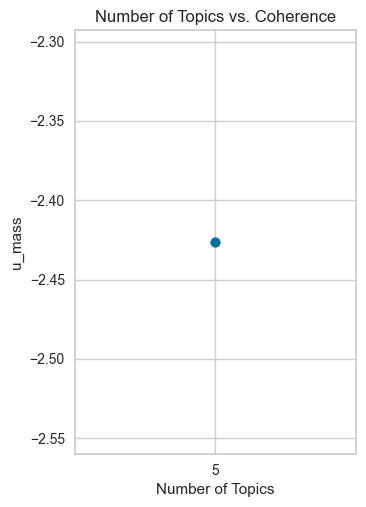

In [27]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

reviews_w_ngrams = pd.DataFrame(amazon_df.lemmatized_review.copy())
reviews_w_ngrams.cleaned_review = reviews_w_ngrams.lemmatized_review.map(lambda x: replace_ngram(x) if isinstance(x, str) else x)

# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
reviews_w_ngrams = reviews_w_ngrams.cleaned_review.map(lambda x: [word for word in x.split() if word not in stop_words and len(word) > 2] if isinstance(x, str) else x)
reviews_w_ngrams.dropna(axis=0, inplace=True)
reviews_w_ngrams.isnull().sum()

final_reviews = reviews_w_ngrams
final_reviews.dropna(axis=0, inplace=True)

dictionary = corpora.Dictionary(final_reviews)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_reviews]

coherence = []
umass = []
px = []
for k in range(5,6):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
                   iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='c_v')
    mm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='u_mass')
    coherence.append((k,cm.get_coherence()))
    umass.append((k,mm.get_coherence()))
    
    
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

x_val_u = [x[0] for x in umass]
y_val_y = [x[1] for x in umass]

plt.subplot(1,2,1)
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('c_v')
plt.xticks(x_val)
plt.show()

plt.subplot(1,2,2)
plt.plot(x_val_u,y_val_y)
plt.scatter(x_val_u,y_val_y)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('u_mass')
plt.xticks(x_val_u)
plt.show()

In [28]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=40,\
            iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(doc_term_matrix, num_topics=5, id2word = dictionary, passes=40,\
            iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

# To show initial topics
ldamodel.show_topics(5, num_words=10, formatted=False)

# To show initial topics
ldamodel2_topics = ldamodel2.show_topics(5, num_words=10, formatted=False)

# topic_data =  pyLDAvis.gensim.prepare(ldamodel2, doc_term_matrix, dictionary, mds = 'pcoa')
# pyLDAvis.display(topic_data)

###################
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+'v3_0129')

# Create directory if it does not exist
if not os.path.exists('./results'):
    os.makedirs('./results')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel2, doc_term_matrix, dictionary, mds = 'pcoa')
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ 'v3_0129' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.041730 -0.006674       1        1  33.843674
2     -0.140021  0.061415       2        1  25.868297
1     -0.120942  0.074078       3        1  19.452150
0      0.035349 -0.222931       4        1  11.746727
3      0.267344  0.094112       5        1   9.089152, topic_info=                Term         Freq        Total Category  logprob  loglift
1782        cleanser  1191.000000  1191.000000  Default  30.0000  30.0000
346           bottle  1044.000000  1044.000000  Default  29.0000  29.0000
815            serum  2206.000000  2206.000000  Default  28.0000  28.0000
532              oil   873.000000   873.000000  Default  27.0000  27.0000
30        foundation   436.000000   436.000000  Default  26.0000  26.0000
915            toner  1305.000000  1305.000000  Default  25.0000  25.0000
155            cream  2770.000000  2770.000000  Default  24.0000  24.0000
865            clean   657.000000   657.000000  Default  23.0000  23.0000
127            scent  1236.000000  1236.000000  Default  22.0000  22.0000
61             smell  1391.000000  1391.000000  Default  21.0000  21.0000
608        cleansing   474.000000   474.000000  Default  20.0000  20.0000
363              eye  1093.000000  1093.000000  Default  19.0000  19.0000
130           sticky   648.000000   648.000000  Default  18.0000  18.0000
1192          gentle   825.000000   825.000000  Default  17.0000  17.0000
112             feel  1493.000000  1493.000000  Default  16.0000  16.0000
855           lotion   510.000000   510.000000  Default  15.0000  15.0000
159          feeling  1034.000000  1034.000000  Default  14.0000  14.0000
749             soft  1040.000000  1040.000000  Default  13.0000  13.0000
1731         retinol   607.000000   607.000000  Default  12.0000  12.0000
631             leaf   845.000000   845.000000  Default  11.0000  11.0000
639          absorbs   658.000000   658.000000  Default  10.0000  10.0000
0               good  2296.000000  2296.000000  Default   9.0000   9.0000
536            patch   343.000000   343.000000  Default   8.0000   8.0000
2996            balm   356.000000   356.000000  Default   7.0000   7.0000
55            greasy   579.000000   579.000000  Default   6.0000   6.0000
901                c   213.000000   213.000000  Default   5.0000   5.0000
51             color   319.000000   319.000000  Default   4.0000   4.0000
916          vitamin   207.000000   207.000000  Default   3.0000   3.0000
270             wash   433.000000   433.000000  Default   2.0000   2.0000
276            shade   219.000000   219.000000  Default   1.0000   1.0000
1731         retinol   607.144626   607.790355   Topic1  -4.7731   1.0824
344          wrinkle   240.633601   241.282868   Topic1  -5.6986   1.0807
4586       bakuchiol   193.765865   194.415016   Topic1  -5.9152   1.0801
1797          repair    95.144891    95.855780   Topic1  -6.6265   1.0760
2672           bloom    85.360275    86.007264   Topic1  -6.7350   1.0759
11407      hydrangea    73.702994    74.347557   Topic1  -6.8818   1.0747
2701      elasticity    66.949074    67.596975   Topic1  -6.9779   1.0738
7903           ‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê    59.139628    59.786642   Topic1  -7.1020   1.0725
1130       immediate    51.950846    52.599784   Topic1  -7.2316   1.0710
2463               ‚úÖ    50.940309    51.603121   Topic1  -7.2512   1.0705
1010             air    48.500250    49.176020   Topic1  -7.3003   1.0696
11246              üîç    44.734048    45.377321   Topic1  -7.3811   1.0691
912             sign    42.811412    43.459158   Topic1  -7.4251   1.0684
3594           doubt    42.411569    43.073576   Topic1  -7.4345   1.0679
2555        sleeping    49.350154    50.125150   Topic1  -7.2829   1.0678
2640         burning   113.113229   114.889616   Topic1  -6.4535   1.0678
4451             bag    40.290217    40.939109   Topic1  -7.4858   1.0674
4819        

In [29]:
topic_data = LDAvis_prepared
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,6): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

lda2_test_results = pd.DataFrame(all_topics).T
lda2_test_results
# lda2_test_results.to_csv(DATA_PATH+'lda3_test_results.csv', encoding='cp949')

0      1        2             3        4       5        6  \
Topic 1       cream    eye  retinol           day     face    help    night   
Topic 2        feel  serum    scent          soft     face  sticky  feeling   
Topic 3    cleanser    oil    clean     cleansing   gentle    face     balm   
Topic 4  foundation  color    shade            bb    patch    good     tone   
Topic 5      bottle      c  vitamin  disappointed  arrived   serum    smell   

                 7         8          9  
Topic 1  sensitive   redness       acne  
Topic 2      toner    lotion     greasy  
Topic 3       wash     toner  sensitive  
Topic 4    cushion     cover       size  
Topic 5  packaging  original        pad

## Î∏åÎûúÎìúÎ≥Ñ ÌèâÏ†ê 4Ï†ê Ïù¥ÏÉÅ

## Î∏åÎûúÎìúÎ≥Ñ ÌèâÏ†ê 2Ï†ê Ïù¥Ìïò

In [ ]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

reviews_w_ngrams = pd.DataFrame(amazon_df_dsa_dr.lemmatized_review.copy())
reviews_w_ngrams.cleaned_review = reviews_w_ngrams.lemmatized_review.map(lambda x: replace_ngram(x) if isinstance(x, str) else x)

# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
reviews_w_ngrams = reviews_w_ngrams.cleaned_review.map(lambda x: [word for word in x.split() if word not in stop_words and len(word) > 2] if isinstance(x, str) else x)
reviews_w_ngrams.dropna(axis=0, inplace=True)
reviews_w_ngrams.isnull().sum()

final_reviews = reviews_w_ngrams
final_reviews.dropna(axis=0, inplace=True)

dictionary = corpora.Dictionary(final_reviews)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_reviews]

coherence = []
umass = []
px = []
for k in range(5,6):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
                   iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='c_v')
    mm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_reviews,\
                                                     dictionary=dictionary, coherence='u_mass')
    coherence.append((k,cm.get_coherence()))
    umass.append((k,mm.get_coherence()))
    

x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

x_val_u = [x[0] for x in umass]
y_val_y = [x[1] for x in umass]

plt.subplot(1,2,1)
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('c_v')
plt.xticks(x_val)
plt.show()

plt.subplot(1,2,2)
plt.plot(x_val_u,y_val_y)
plt.scatter(x_val_u,y_val_y)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('u_mass')
plt.xticks(x_val_u)
plt.show()

In [ ]:
num = 5

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=num, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(doc_term_matrix, num_topics=num, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

# To show initial topics
ldamodel.show_topics(num, num_words=10, formatted=False)

# To show initial topics
ldamodel2_topics = ldamodel2.show_topics(num, num_words=10, formatted=False)

# topic_data =  pyLDAvis.gensim.prepare(ldamodel2, doc_term_matrix, dictionary, mds = 'pcoa')
# pyLDAvis.display(topic_data)

###################
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+'v3_0129')

# Create directory if it does not exist
if not os.path.exists('./results'):
    os.makedirs('./results')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel2, doc_term_matrix, dictionary, mds = 'pcoa')
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ 'v3_0129' +'.html')
LDAvis_prepared

In [ ]:
topic_data = LDAvis_prepared
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,num+1): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

lda2_test_results = pd.DataFrame(all_topics).T
lda2_test_results
# lda2_test_results.to_csv(DATA_PATH+'lda3_test_results.csv', encoding='cp949')